<a href="https://colab.research.google.com/github/jiiiisoo/machinelearning/blob/main/supervised%20learning_regression_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **지도학습 : 회귀**
1. 1차원 직선 모델

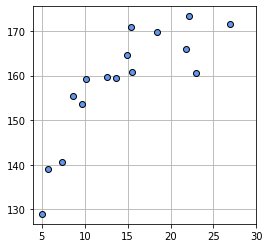

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 나이에 따른 몸무게의 인공 데이터 생성
np.random.seed(seed=1)
X_min=4 #X의 하한
X_max=30 #X의 상한
X_n=16 #데이터 개수
X=5+25*np.random.rand(X_n) #16명 나이 설정
Prm_c=[170, 108, 0.2] #생성 매개 변수
T=Prm_c[0]-Prm_c[1]*np.exp(-Prm_c[2]*X)+4*np.random.randn(X_n) #T:출력값
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)

# 데이터 그래프
plt.figure(figsize=(4,4))
plt.plot(X,T,marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()


데이터에 따라 직선이 그려지면 새로운 나이 데이터의 키를 예측할 수 있다.
직선의 방정식을 y=w_0x+w_1 이라고 한다면, x_n에서의 오차 제곱은 (y_n-t_n)^2 이고, 모든 데이터 점의 제곱 오차의 평균은 J로 나타낼 수 있다.

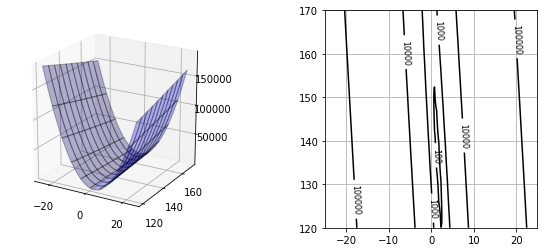

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

#평균 오차 함수
def J_func(x,t,w):
  y=w[0]*x+w[1]
  J_mean=np.mean((y-t)**2)
  return J_mean

#계산
xn=100 #등고선 표시 해상도
w0_range=[-25,25] #기울기 범위
w1_range=[120,170] #y절편 범위
x0=np.linspace(w0_range[0],w0_range[1],xn) #기울기
x1=np.linspace(w1_range[0],w1_range[1],xn) #y절편
xx0,xx1=np.meshgrid(x0,x1)
J=np.zeros((len(x0),len(x1)))

for i0 in range(xn):
  for i1 in range(xn):
    J[i1,i0]=J_func(X,T,(x0[i0],x1[i1])) #x0,x1에 따른 평균오차

#표시
plt.figure(figsize=(9.5,4))
plt.subplots_adjust(wspace=0.5)

ax=plt.subplot(1,2,1,projection='3d')
ax.plot_surface(xx0,xx1,J,rstride=10, cstride=10, alpha=0.3,color='blue',edgecolor='black')
ax.set_xticks([-20,0,20])
ax.set_yticks([120,140,160])
ax.view_init(20,-60)

#평균 제곱 오차 (J)의 등고선 표시
plt.subplot(1,2,2)
con=plt.contour(xx0,xx1,J,30,colors='black',levels=[100, 1000, 10000, 100000])
con.clabel(fmt='%1.0f',fontsize=8)
plt.grid(True)
plt.show()

왼쪽 그래프는 평균 제곱 오차를 3D 형태로, 오른쪽 그래프는 J의 등고선을 표시한 것이다.

왼쪽 그래프에서 -25-25는 w0, 120-170은 w1, z축은 J를 나타낸다. 이를 통해 w0에 따라 J의 크기 변화가 큰 것을 알 수 있다.

오른쪽 그래프는 왼쪽 그래프에서는 w1의 방향 변화를 알기 어려우므로 w0,w1축으로 J의 등고선을 표시한 것이다. 그러면 계곡의 바닥도 절편 w1 방향으로 높이가 변화하는 것으로 나타난다. 이를 통해 약 w0=3, w1=135 근처로 J가 최솟값을 취할 것 같다.(????)

**경사하강법**

J가 가장 작아지는 w0, w1은 경사하강법을 통해 구할 수 있다. 경사하강법이란 적당한 w0,w1을 찾고 기울기를 확인한 뒤 J 감소하는 방향으로 w0,w1을 조금씩 변경하며 이 과정을 반복하여 그릇 바닥인 최소를 찾는 방법이다. 

W를 갱신방법 (학습방법) 이라고 하면

W(t+1)=W(t)-α∇𝘸|𝚠\(𝘵)

W(t)는 현재 벡터의 지점, α는 학습율으로 w 갱신의 폭을 조절하고, ∇𝘸|𝚠\(𝘵) 는 현재 지점의 기울기를 나타낸다.

따라서 w0, w1에 대하여 각각 편미분 하여 J에 대해 감소하는 방향으로 w0, w1을 진행시키면 최소를 찾을 수 있을 것이다.

반복횟수13820
W=1.539947, 136.176160
dMSE=-0.005794, 0.099991
MSE=49.027452


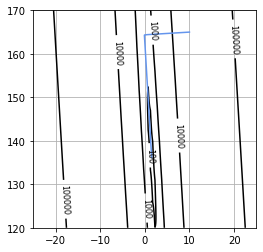

In [ ]:
def J_line(x,t,w):
  y=w[0]*x+w[1]
  d_w0=2*np.mean((y-t)*x)
  d_w1=2*np.mean(y-t)
  return d_w0, d_w1

#경사하강법
def fit_line_num(x,t):
  w_init=[10.0,165.0] #초기 w값
  alpha=0.001 #학습률
  i_max=100000 #반복 최대 수
  eps=0.1 #기울기가 eps보다 작아지면 반복 종료할 수 있도록 설정
  w_i=np.zeros([i_max,2]) #반복시마다 w0,w1 저장하기 위함
  w_i[0,:]=w_init #init으로 첫 실행 시작
  for i in range (1,i_max):
    dmse=J_line(x,t,w_i[i-1]) #w0,w1으로 J기울기 편미분 한 값
    w_i[i,0]=w_i[i-1,0]-alpha*dmse[0]
    w_i[i,1]=w_i[i-1,1]-alpha*dmse[1]
    if max(np.absolute(dmse))<eps:
      break
  w0=w_i[i,0]
  w1=w_i[i,1]
  w_i=w_i[:i,:]
  return w0, w1, dmse, w_i

#메인
plt.figure(figsize=(4,4))
xn=100 #등고선 표시 해상도
w0_range=[-25,25] #기울기 범위
w1_range=[120,170] #y절편 범위
x0=np.linspace(w0_range[0],w0_range[1],xn) #기울기
x1=np.linspace(w1_range[0],w1_range[1],xn) #y절편
xx0,xx1=np.meshgrid(x0,x1)
J=np.zeros((len(x0),len(x1)))
for i0 in range(xn):
  for i1 in range(xn):
    J[i1,i0]=J_func(X,T,(x0[i0],x1[i1])) #x0,x1에 따른 평균오차
con=plt.contour(xx0,xx1,J,30,colors='black',levels=[100, 1000, 10000, 100000])
con.clabel(fmt='%1.0f',fontsize=8)
plt.grid(True)

#경사하강법 호출
W0,W1,dMSE,W_history=fit_line_num(X,T)

#결과
print('반복횟수{0}'.format(W_history.shape[0]))
print('W={0:.6f}, {1:6f}'.format(W0,W1))
print('dMSE={0:.6f}, {1:.6f}'.format(dMSE[0],dMSE[1]))
print('MSE={0:.6f}'.format(J_func(X,T,[W0,W1])))
plt.plot(W_history[:,0],W_history[:,1], '-', color='cornflowerblue', markersize=10, markeredgecolor='cornflowerblue')
plt.show()

w0=1.540, w1=136.176
SD=7.002 cm


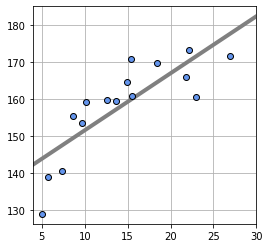

In [ ]:
#경사 하강법에 의한 직선 모델의 피팅 결과
def show_line(w):
  xb=np.linspace(X_min,X_max,100)
  y=w[0]*xb+w[1]
  plt.plot(xb,y,color=(.5,.5,.5), linewidth=4)

plt.figure(figsize=(4,4))
W=np.array([W0,W1])
mse=J_func(X,T,W)
print('w0={0:.3f}, w1={1:.3f}'.format(W0,W1))
print('SD={0:.3f} cm'.format(np.sqrt(mse)))
show_line(W)
plt.plot(X,T,marker='o',linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()